In [97]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

def texte_vers_ascii(texte):
    ascii_liste = [ord(char) for char in texte]
    return ascii_liste

def ascii_vers_binaire(ascii_liste):
    binaire_liste = [bin(ascii_val)[2:].zfill(8) for ascii_val in ascii_liste]
    return binaire_liste

# Entrée du message
message_texte = str(input('Entrez le message à envoyer : '))

# Conversion du texte en ASCII puis en binaire
ascii_resultat = texte_vers_ascii(message_texte)
binaire_resultat = ascii_vers_binaire(ascii_resultat)

print(f"Texte : {message_texte}")
print(f"Valeurs ASCII : {ascii_resultat}")
print(f"Valeurs binaires : {binaire_resultat}")

# Définition de la fonction XOR utilisée pour la division
def xor(a, b):
    resultat = []
    for i in range(1, len(b)):
        if a[i] == b[i]:
            resultat.append('0')
        else:
            resultat.append('1')
    return ''.join(resultat)

# Définition de la fonction division euclidienne
def Division_eucl(divident, diviseur):
    val = len(diviseur)
    tmp = divident[0:val]
    while val < len(divident):
        if tmp[0] == '1':
            tmp = xor(diviseur, tmp) + divident[val]
        else:
            tmp = xor('0' * val, tmp) + divident[val]
        val += 1
    if tmp[0] == '1':
        tmp = xor(diviseur, tmp)
    else:
        tmp = xor('0' * val, tmp)
    check = tmp
    return check

# Fonction Main
total_binary = ''.join(binaire_resultat)  # Utilisez le résultat binaire de la conversion du texte en ASCII

data = total_binary
key = '11010'

print("Les données à envoyer sont :", data)
print("La clé CRC est:", key)

data_crc = encodage(data, key)
print("Les données encodées avec la clé key sont :", data_crc)
message_bool = [bit == '1' for bit in data_crc]

# Codage Manchester du message
message_code = []
for ii in range(len(message_bool)):
    if message_bool[ii]:
        message_code.extend([1, 0])
    else:
        message_code.extend([0, 1])

print("Message codé avec Manchester :", message_code)


Texte : nhb zb 
Valeurs ASCII : [110, 104, 98, 32, 122, 98, 32]
Valeurs binaires : ['01101110', '01101000', '01100010', '00100000', '01111010', '01100010', '00100000']
Les données à envoyer sont : 01101110011010000110001000100000011110100110001000100000
La clé CRC est: 11010
Les données encodées avec la clé key sont : 011011100110100001100010001000000111101001100010001000000000
Message codé avec Manchester : [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


[0.0, 0.8438695627580832, -0.9055536888925845, 0.12787716168450614, 0.7683291217331273, -0.9523686484908523, 0.2536545839095076, 0.6801727377709194, -0.9835457412105529, 0.3752670048793753, 0.580847936258902, -0.9985730400511657, 0.49071755200393835, 0.47198562769192276, -0.9972037971811801, 0.5981105304912158, 0.3553733281669859, -0.9794604955306668, 0.6956825506034883, 0.23292580841837981, -0.945634479622186, 0.7818314824680287, 0.10665365333511861, -0.8962811717017877, 0.8551427630053468, -0.02136975178729879, -0.8322109517210735, 0.9144126230158112, -0.14904226617617447, -0.7544758509208123, 0.9586678530366605, -0.27426751067493316, -0.6643522775070414, 0.9871817834144516, -0.39498929023093726, -0.5633200580636205, 0.999486216200688, -0.5092253565614182, -0.45303813884061916, 0.9953791129491981, -0.6150999566154672, -0.33531734590277074, 0.9749279121818244, -0.7108746323872349, -0.21209065141553365, 0.9384684220497582, -0.794976766348395, -0.08538143429562968, 0.8865993063729991, -

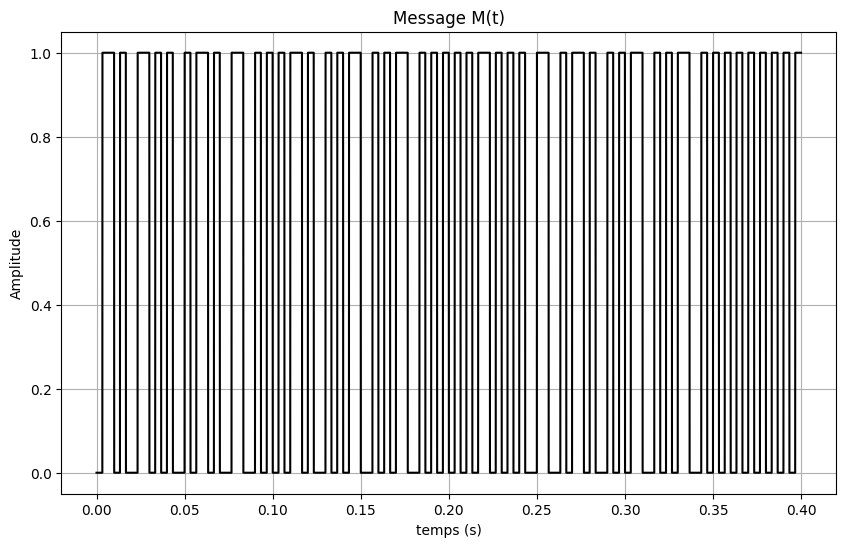

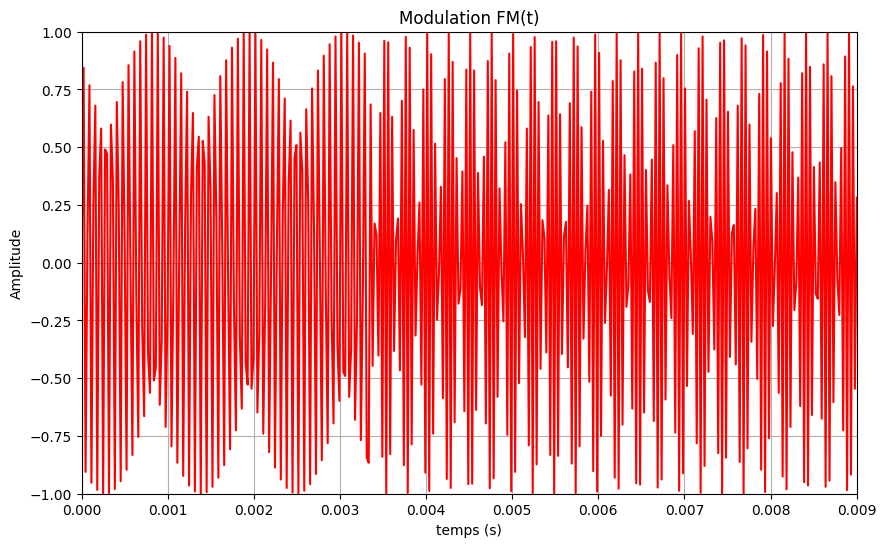

In [98]:
M = message_code                           #Stockage du mesage dans une variable "M"
Fe = 44100                                 #Initialisation de la fréquence d'échantillonnage à 88 200Hz (soit le double de 44 100Hz)
Fp = 10000                                #Initialisation de la fréquence de la porteuse à 35 000Hz (Pour que le son sot inaudible)
baud = 300                                 #Initialisation du débit souhaité sur le canal de transmission à 600bit/s
Nbits = len(M)                             #Initialisation du nombre de bits initial
Ns = Fe/baud                               #Initialisation du nombre de symboles par bit (Fréquence d'échantillonnage/débit binaire)
N = Nbits*Ns                               #Initialisation du nombre de bits total à moduler (Nombre de symbole par bits*Nombre de bits)

M_duplique = np.repeat(M,Ns)                                                  # On génère le message binaire dupliqué

t = np.arange (0.0,N)/Fe                                                      #On génère le vecteur temps

# Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0
A1 =  1                                        
A2 =  1                  
fp1 =  20000                
fp2 =  15000 
P1 =  A1*np.sin(2*np.pi*fp1*t)                                               
P2 =  A2*np.sin(2*np.pi*fp2*t)

FSK=[P1[i] if M_duplique[i]==1 else P2[i] for i in range(len(M_duplique))] 
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

#Affichage du signal modulé
plt.figure (figsize = (10,6))
plt.plot(t,FSK,'r')
plt.title('Modulation FM(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0,0.009,-1,1])
plt.grid()
sd.play(FSK,Fe)
print(FSK)

La modulation avec ASK est :[ 0.          0.          0.         ... -0.41453118 -0.28111111
 -0.14199432]


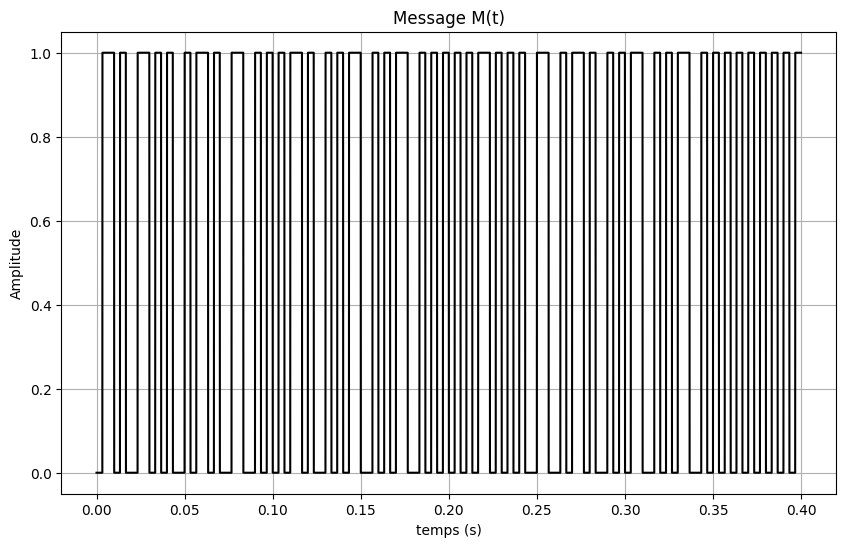

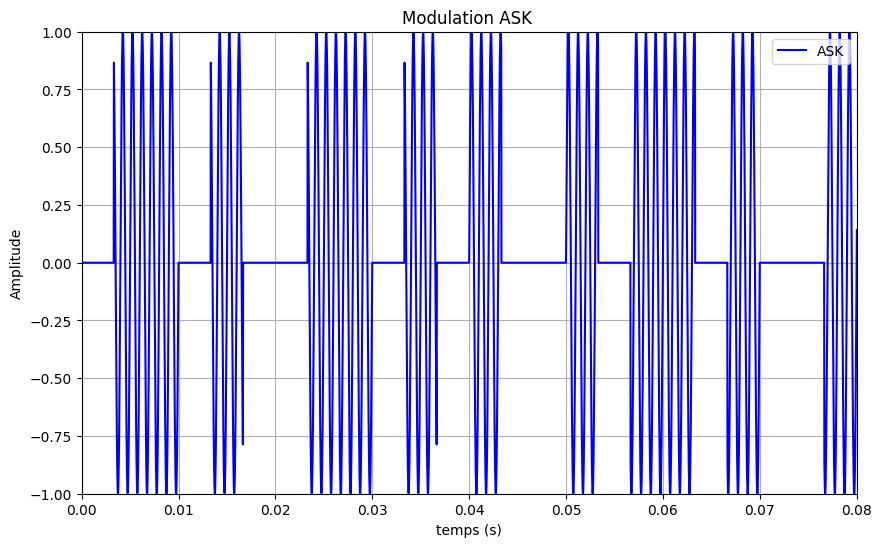

In [99]:
Fe = 44100
baud = 300
Ns = int(Fe / baud)
Nbits = len(message_code)
N = int(Nbits * Ns)

# Duplication du message binaire
M_duplique = np.repeat(message_code, Ns)

t = np.arange(0.0, N) / Fe

# Génération de la porteuse
Ap = 1
Fp = 1000
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)

# Modulation ASK
ASK = Porteuse * M_duplique
print(f'La modulation avec ASK est :{ASK}')
plt.figure (figsize = (10,6))
plt.plot(t,M_duplique,'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

# Affichage du signal modulé ASK et FSK
plt.figure(figsize=(10, 6))
plt.plot(t, ASK, 'b', label='ASK')
plt.title('Modulation ASK ')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0,0.08,-1,1])
plt.legend()
plt.grid()
plt.show()

# Émission du message sous forme de signal (Jouer le son)
sd.play(ASK, Fe)
sd.wait()

# Réception

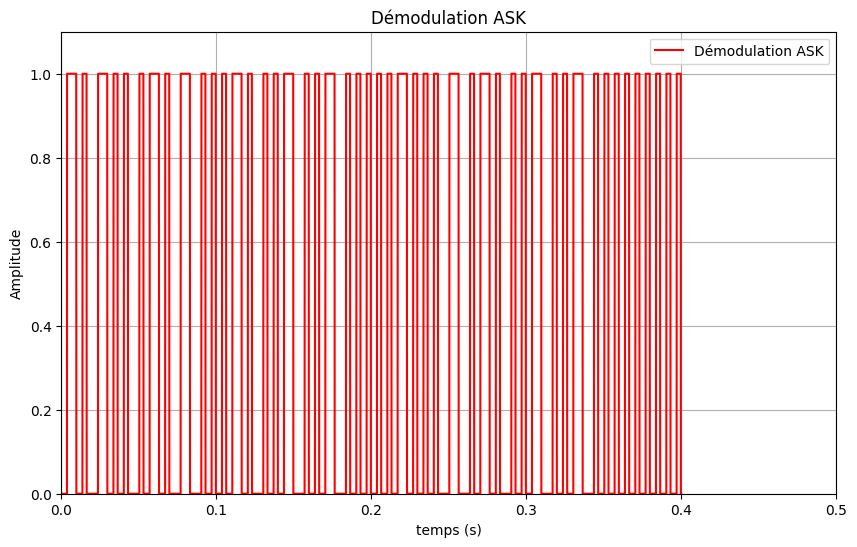

In [100]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# Paramètres de la modulation
Fe = 44100
baud = 300
Ns = int(Fe / baud)
Fp = 1000
Ap = 1

# Génération de la porteuse
t = np.arange(0.0, N) / Fe
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)

# Réception du signal modulé ASK
signal_recu = ASK * Porteuse

# Filtre passe-bas pour extraire le signal de base
fc = Fp  # fréquence de coupure
w = 2 * np.pi * fc / Fe
b, a = np.ones(Ns) / Ns, [1, -np.exp(-1j * w)]
signal_base = np.convolve(signal_recu, b, mode='same')

# Décodage avec un seuil
seuil = 0.3
message_decode = np.where(signal_base > seuil, 1, 0)

# Affichage du signal démodulé
plt.figure(figsize=(10, 6))
plt.plot(t, message_decode, 'r', label='Démodulation ASK')
plt.title('Démodulation ASK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.5, 0, 1.1])
plt.legend()
plt.grid()
plt.show()
sd.play(message_decode,Fe)


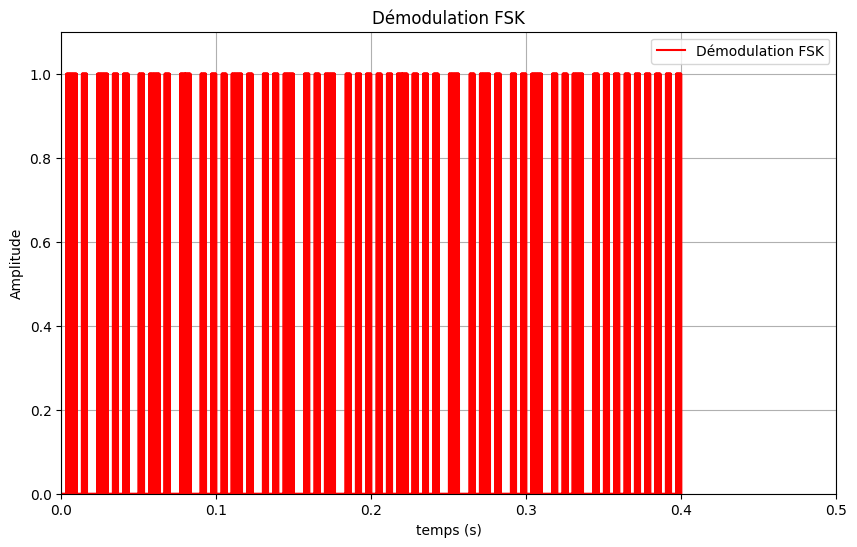

In [101]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# Paramètres de la modulation
Fe = 44100
Fp1 = 20000  # Fréquence pour le bit 1
Fp2 = 15000  # Fréquence pour le bit 0
baud = 300
Ns = int(Fe / baud)

# Génération des porteuses
t = np.arange(0.0, N) / Fe
P1 = np.sin(2 * np.pi * Fp1 * t)
P2 = np.sin(2 * np.pi * Fp2 * t)

# Réception du signal modulé FSK

signal_recu = FSK

# Ajustement des dimensions de P1 et P2
P1 = np.resize(P1, len(signal_recu))
P2 = np.resize(P2, len(signal_recu))

# Détecteur de phase
phase_diff_P1 = np.angle(signal_recu * np.conj(P1))
phase_diff_P2 = np.angle(signal_recu * np.conj(P2))

# Décodage en comparant les différences de phase
message_decode = np.where(phase_diff_P1 < phase_diff_P2, 1, 0)

# Affichage du signal démodulé
plt.figure(figsize=(10, 6))
plt.plot(t, message_decode, 'r', label='Démodulation FSK')
plt.title('Démodulation FSK')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.axis([0, 0.5, 0, 1.1])
plt.legend()
plt.grid()
plt.show()


# Decodage Manchester

In [102]:

def manchester_decode( message_code):
    decoded_data = []
    for i in range(0, len( message_code), 2):
        if  message_code[i] == 1 and  message_code[i + 1] == 0:
            decoded_data.append(1)
        elif  message_code[i] == 0 and  message_code[i + 1] == 1:
            decoded_data.append(0)
        else:
            raise ValueError("Invalid Manchester encoding")

    return decoded_data

 # Remplacez cela par votre séquence encodée
decoded_data = manchester_decode( message_code)

print("Séquence encodée de Manchester:",  message_code)
print("Séquence décodée de Manchester:", decoded_data)
 

Séquence encodée de Manchester: [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
Séquence décodée de Manchester: [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [103]:
# Décodage Manchester du message
decoded_message = []
for i in range(0, len(message_code), 2):
    if message_code[i] == 1 and message_code[i + 1] == 0:
        decoded_message.append(1)
    elif message_code[i] == 0 and message_code[i + 1] == 1:
        decoded_message.append(0)
    else:
        # Gestion d'erreur ou cas non pris en charge
        print("Erreur dans le signal Manchester")

# Convertir la liste de bits en une chaîne de caractères
decoded_message_str = ''.join(str(bit) for bit in decoded_message)

print("Message Manchester décodé :", decoded_message_str)
# Définition de la fonction de décodage CRC
def decodage(data_received, key):
    length_key = len(key)

    # La fonction de division euclidienne est utilisée sur les données reçues
    remainder = Division_eucl(data_received, key)

    # Si le reste est différent de zéro, il y a une erreur
    if int(remainder, 2) != 0:
        print("Erreur de transmission détectée. Les données peuvent être corrompues.")
    else:
        print("Aucune erreur de transmission détectée. Les données sont valides.")

# Exemple d'utilisation
data_received = encodage(total_binary, key)  # Simuler la réception des données encodées
print("Les données reçues sont :", data_received)

# Appel de la fonction de décodage
decodage(data_received, key)



Message Manchester décodé : 011011100110100001100010001000000111101001100010001000000000
Les données reçues sont : 011011100110100001100010001000000111101001100010001000000000
Aucune erreur de transmission détectée. Les données sont valides.


In [104]:
# Définition de la fonction de décodage CRC
def decodage(data_received, key):
    length_key = len(key)

    # La fonction de division euclidienne est utilisée sur les données reçues
    remainder = Division_eucl(data_received, key)

    # Si le reste est différent de zéro, il y a une erreur
    if int(remainder, 2) != 0:
        print("Erreur de transmission détectée. Les données peuvent être corrompues.")
    else:
        print("Aucune erreur de transmission détectée. Les données sont valides.")

# Exemple d'utilisation
data_received = encodage(total_binary, key)  # Simuler la réception des données encodées
print("Les données reçues sont :", data_received)

# Appel de la fonction de décodage
decodage(data_received, key)


Les données reçues sont : 011011100110100001100010001000000111101001100010001000000000
Aucune erreur de transmission détectée. Les données sont valides.


In [105]:
def binaire_vers_texte(binary_str):
    octets = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    texte = ''.join(chr(int(octet, 2)) for octet in octets)
    return texte

# Exemple d'utilisation avec votre chaîne binaire complète
message_binaire_complet =data_received   # Remplacez cela par votre propre chaîne binaire complète
message_texte = binaire_vers_texte(message_binaire_complet)

print("Message binaire complet :", message_binaire_complet)
print("Message texte obtenu :", message_texte)


Message binaire complet : 011011100110100001100010001000000111101001100010001000000000
Message texte obtenu : nhb zb  


In [106]:
total_binary = ''

# Conversion du message en binaire
for i in range(len(Message)):
    binary = ''
    string_ord = ord(Message[i])
    while string_ord > 0:
        x = string_ord % 2
        string_ord = string_ord // 2
        binary = str(x) + str(binary)
    total_binary += binary

print(f'Votre message : {Message}')
print(f'Message binaire complet : {total_binary}')

Votre message : MALIKZZ
Message binaire complet : 1001101100000110011001001001100101110110101011010
